In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [2]:
%pylab inline

plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["figure.dpi"] =  150

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
from tensorpotential.utils import *

2024-11-17 22:18:05.447409: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 22:18:05.479354: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-17 22:18:05.479378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-17 22:18:05.480349: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 22:18:05.485832: I tensorflow/core/platform/cpu_feature_guar

# Visualize dataset

In [5]:
df_train = pd.read_pickle("seed/1/training_set.pkl.gz")

In [6]:
df_test = pd.read_pickle("seed/1/test_set.pkl.gz")

In [7]:
e_bins=np.linspace(-5,10, num=100)

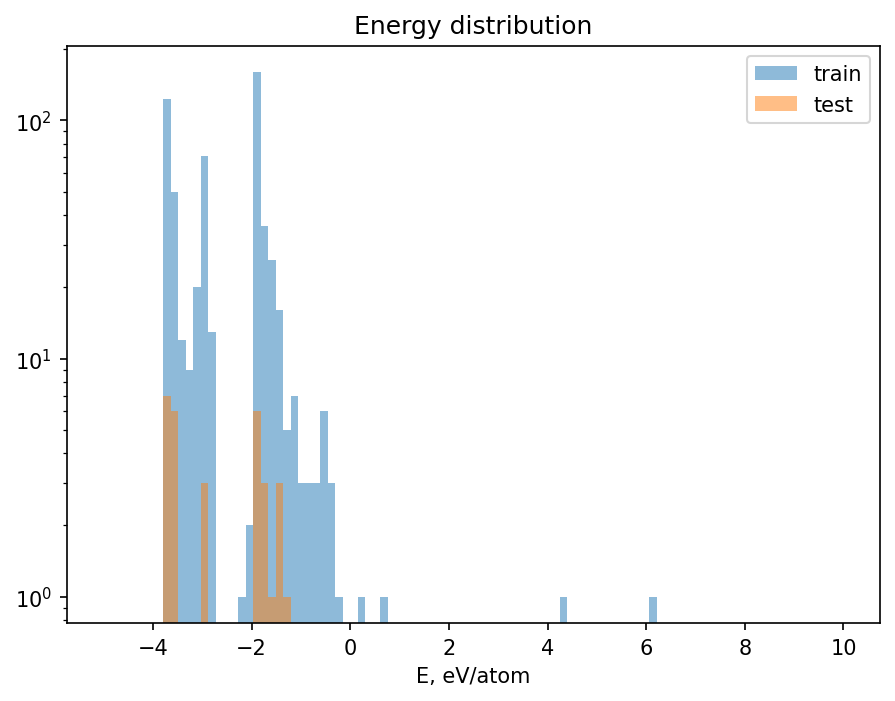

In [8]:
plt.hist(df_train['energy_corrected_per_atom'], bins=e_bins, label='train',alpha=0.5);
plt.hist(df_test['energy_corrected_per_atom'], bins=e_bins, label='test', alpha=0.5);
plt.legend()
plt.xlabel("E, eV/atom")
plt.yscale('log')
plt.title("Energy distribution");

In [9]:
f_bins=np.linspace(-5,5,num=100)

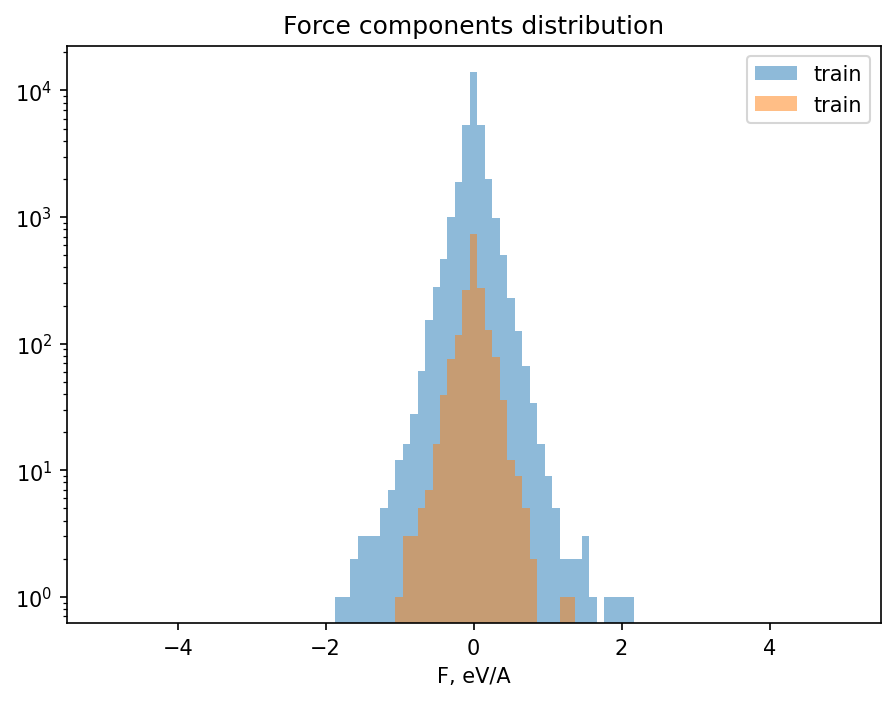

In [10]:
plt.hist(np.vstack(df_train['forces']).flatten(), bins=f_bins, label='train',alpha=0.5);
plt.hist(np.vstack(df_test['forces']).flatten(), bins=f_bins, label='train',alpha=0.5);
plt.legend()
plt.xlabel("F, eV/A")
plt.yscale('log');
plt.title("Force components distribution");

In [11]:
s_bins = np.linspace(-10,10,num=100);

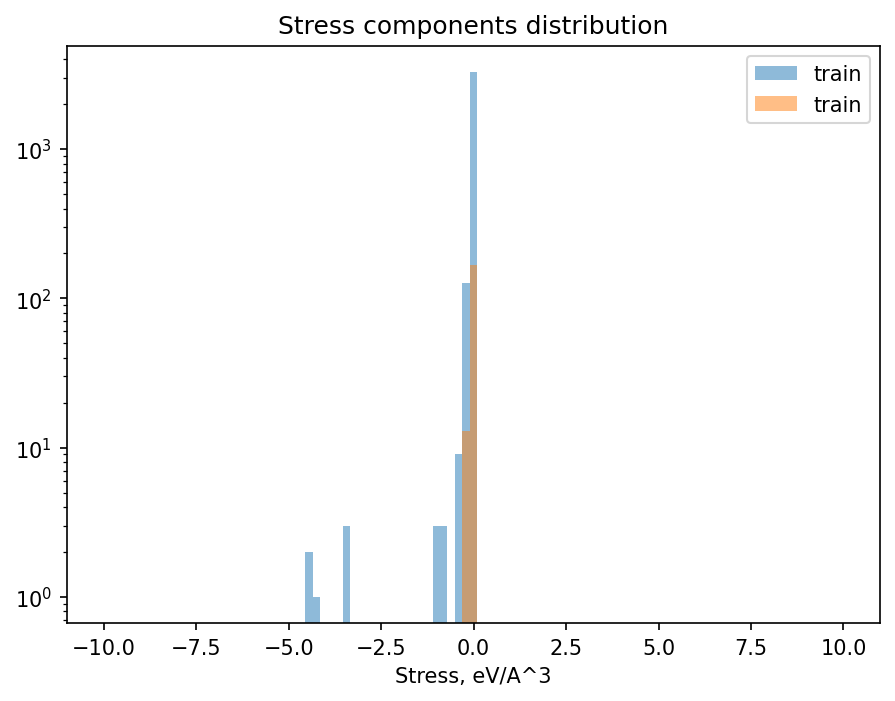

In [12]:
plt.hist(np.vstack(df_train['stress']).flatten(), bins=s_bins, label='train',alpha=0.5);
plt.hist(np.vstack(df_test['stress']).flatten(), bins=s_bins, label='train',alpha=0.5);
plt.legend()
plt.xlabel("Stress, eV/A^3")
plt.yscale('log');
plt.title("Stress components distribution");

# Initialize

In [13]:
fit_dict={}

# Add new fits here

In [14]:
folders=discovery_fit_folders(".")
folders

['./seed/1', './seed/2', './seed/3']

# Rerun to update

In [15]:
update_fit_metrics(fit_dict, folders)

./seed/1 500
./seed/2 500
./seed/3 500


In [16]:
fkey="per_group_metrics.low.mae/depa"

In [17]:
common_prefix,df, gdf=process_fit_dict(fit_dict, fkey=fkey, align_folder=True)

In [18]:
df[["name","mae/depa","mae/f_comp",
    "per_group_metrics.low.mae/depa",
    "per_group_metrics.low.mae/f_comp",
    "epoch"]].sort_values(fkey).head(50)

,name,mae/depa,mae/f_comp,per_group_metrics.low.mae/depa,per_group_metrics.low.mae/f_comp,epoch
499,./seed/1,0.043063,0.007631,0.003318,0.007656,500.0
354,./seed/3,0.058721,0.006122,0.006407,0.006246,355.0
492,./seed/2,0.052922,0.007073,0.038385,0.007098,493.0


In [19]:
# gdf

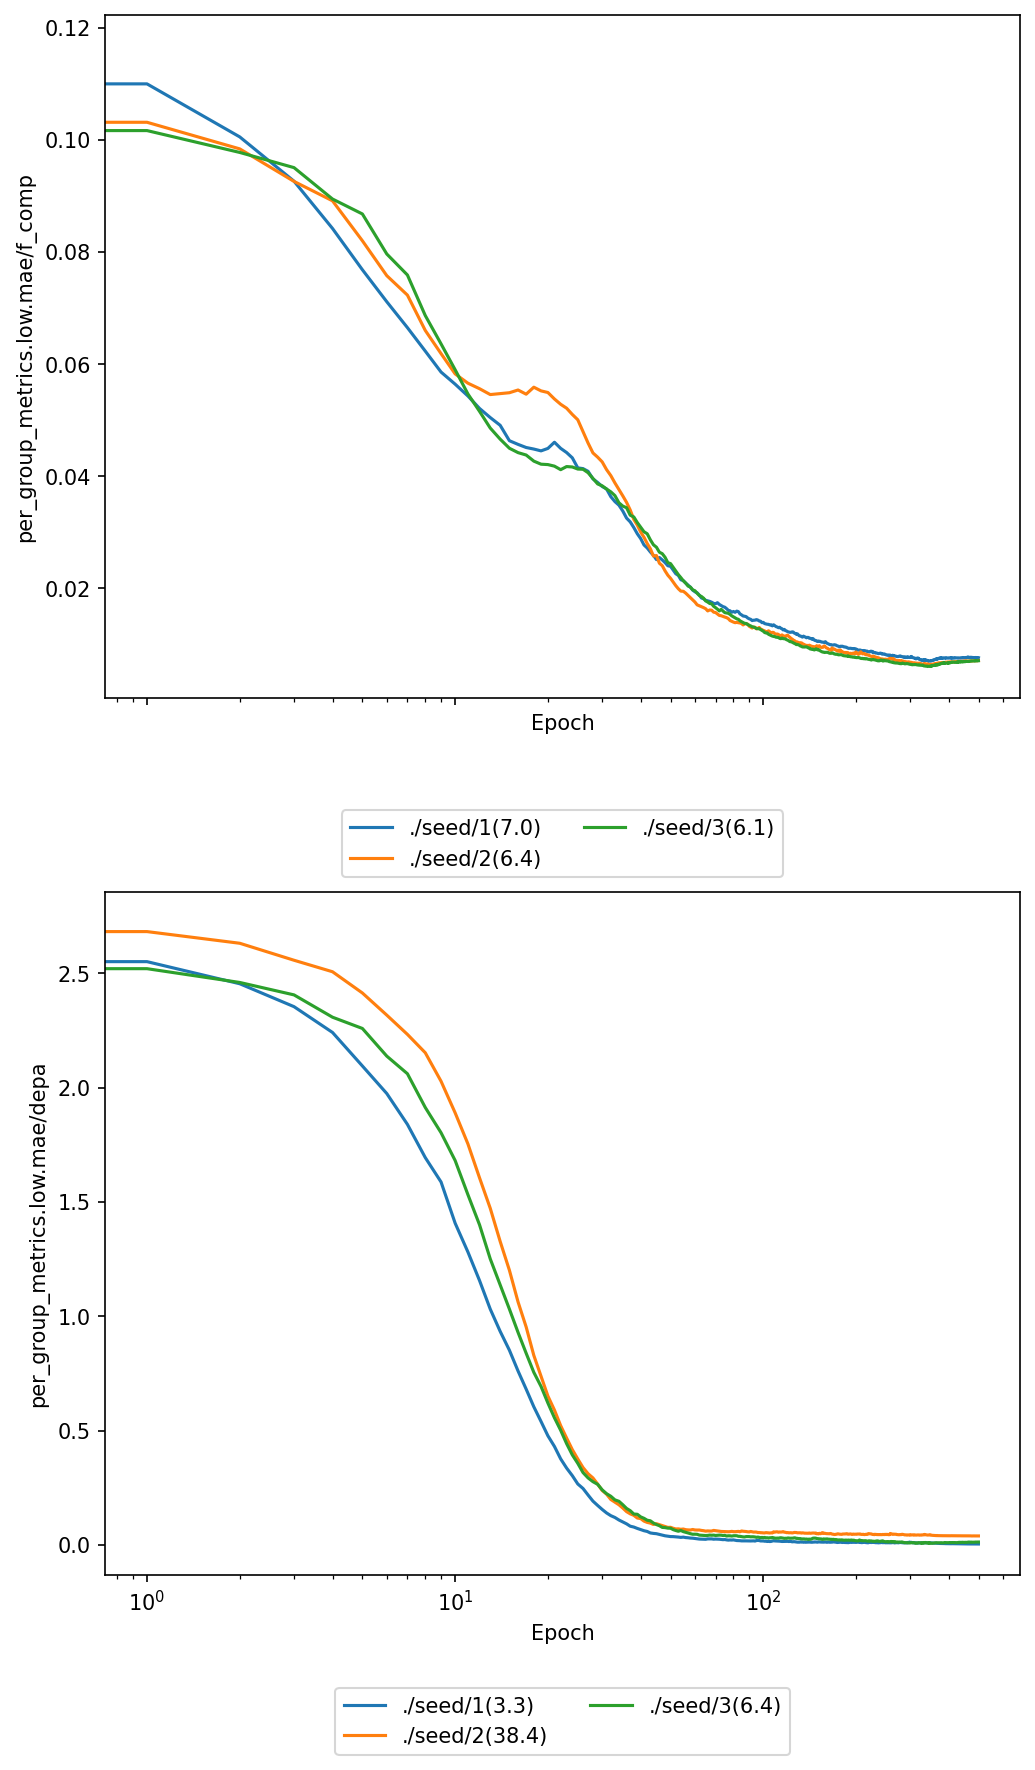

In [20]:
fig, ax_e, ax_f = plot_dashboard(fit_dict,
                                 plot_train=False,
                                 label="shortname_and_seed", 
                                 metric="per_group_metrics.low.mae" # 
                                )
ax_e.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")
ax_f.legend(ncol=2, bbox_to_anchor=(0.5,-0.15), loc="upper center")


ax_e.set_xscale('log')
fig.suptitle(common_prefix)
fig.tight_layout()